In [2]:
import pandas as pd

file_path = r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\social_media_viral_content_dataset.csv"
df = pd.read_csv(file_path)
df.head()


,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1


In [3]:
df.info()
df.describe(include='all')
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2000 non-null   object 
 1   platform         2000 non-null   object 
 2   content_type     2000 non-null   object 
 3   topic            2000 non-null   object 
 4   language         2000 non-null   object 
 5   region           2000 non-null   object 
 6   post_datetime    2000 non-null   object 
 7   hashtags         2000 non-null   object 
 8   views            2000 non-null   int64  
 9   likes            2000 non-null   int64  
 10  comments         2000 non-null   int64  
 11  shares           2000 non-null   int64  
 12  engagement_rate  2000 non-null   float64
 13  sentiment_score  2000 non-null   float64
 14  is_viral         2000 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 234.5+ KB


post_id            0
platform           0
content_type       0
topic              0
language           0
region             0
post_datetime      0
hashtags           0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
sentiment_score    0
is_viral           0
dtype: int64

In [4]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)


In [5]:
numeric_cols = ['likes', 'shares', 'comments', 'views', 'engagement_rate']

for col in numeric_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(',', '')
            .str.replace('%', '')
            .astype(float)
        )


In [6]:
date_cols = ['post_date', 'created_at', 'timestamp']

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')


In [7]:
df['total_engagement'] = df[['likes', 'shares', 'comments']].sum(axis=1)


In [8]:
df['engagement_per_view'] = df['total_engagement'] / df['views']


In [9]:
df['virality_score'] = (
    df['shares'] * 2 +
    df['comments'] * 1.5 +
    df['likes'] * 0.5
)


In [10]:
if 'post_date' in df.columns:
    df['post_hour'] = df['post_date'].dt.hour
    df['post_day'] = df['post_date'].dt.day
    df['post_weekday'] = df['post_date'].dt.weekday


In [11]:
if 'caption' in df.columns:
    df['caption_length'] = df['caption'].astype(str).str.len()
    df['caption_word_count'] = df['caption'].astype(str).str.split().str.len()


In [12]:
df.columns.tolist()


['post_id',
 'platform',
 'content_type',
 'topic',
 'language',
 'region',
 'post_datetime',
 'hashtags',
 'views',
 'likes',
 'comments',
 'shares',
 'engagement_rate',
 'sentiment_score',
 'is_viral',
 'total_engagement',
 'engagement_per_view',
 'virality_score']

In [13]:
df['post_datetime'] = pd.to_datetime(df['post_datetime'], errors='coerce')


In [14]:
num_cols = ['views', 'likes', 'comments', 'shares', 'engagement_rate',
            'sentiment_score', 'total_engagement', 'engagement_per_view',
            'virality_score']

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


In [15]:
df['total_engagement'] = df[['likes', 'comments', 'shares']].sum(axis=1)


In [16]:
df['engagement_per_view'] = df.apply(
    lambda x: x['total_engagement'] / x['views'] if x['views'] > 0 else 0,
    axis=1
)


In [17]:
df['virality_score'] = (
    df['shares'] * 2 +
    df['comments'] * 1.5 +
    df['likes'] * 0.5
)


In [18]:
df['post_hour'] = df['post_datetime'].dt.hour
df['post_day'] = df['post_datetime'].dt.day
df['post_weekday'] = df['post_datetime'].dt.weekday
df['post_month'] = df['post_datetime'].dt.month
df['post_year'] = df['post_datetime'].dt.year


In [19]:
df['num_hashtags'] = df['hashtags'].astype(str).apply(
    lambda x: len([h for h in x.split() if h.startswith('#')])
)


In [20]:
cat_cols = ['platform', 'content_type', 'topic', 'language', 'region']

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()


In [21]:
df = df.dropna(subset=['post_datetime'])


In [22]:
df_cleaned = df.copy()
df_cleaned.head()


,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,...,is_viral,total_engagement,engagement_per_view,virality_score,post_hour,post_day,post_weekday,post_month,post_year,num_hashtags
0,SM_100000,instagram,text,sports,ur,uk,2024-12-10,#tech #funny #music,2319102.0,122058.0,...,1,138719.0,0.059816,86451.0,0,10,1,12,2024,3
1,SM_100001,instagram,carousel,sports,ur,brazil,2024-10-13,#news #fyp #funny #ai #trending,2538464.0,110368.0,...,1,176544.0,0.069548,181891.5,0,13,6,10,2024,5
2,SM_100002,youtube shorts,video,technology,ur,uk,2024-05-03,#ai #news,1051176.0,87598.0,...,0,178926.0,0.170215,202857.0,0,3,4,5,2024,2
3,SM_100003,x,text,politics,ur,us,2024-08-04,#ai #funny,5271440.0,329465.0,...,1,389975.0,0.073979,285365.5,0,4,6,8,2024,2
4,SM_100004,youtube shorts,text,education,es,us,2024-03-28,#news #ai #viral #funny #fyp,3186256.0,199141.0,...,1,287562.0,0.090251,273754.5,0,28,3,3,2024,5


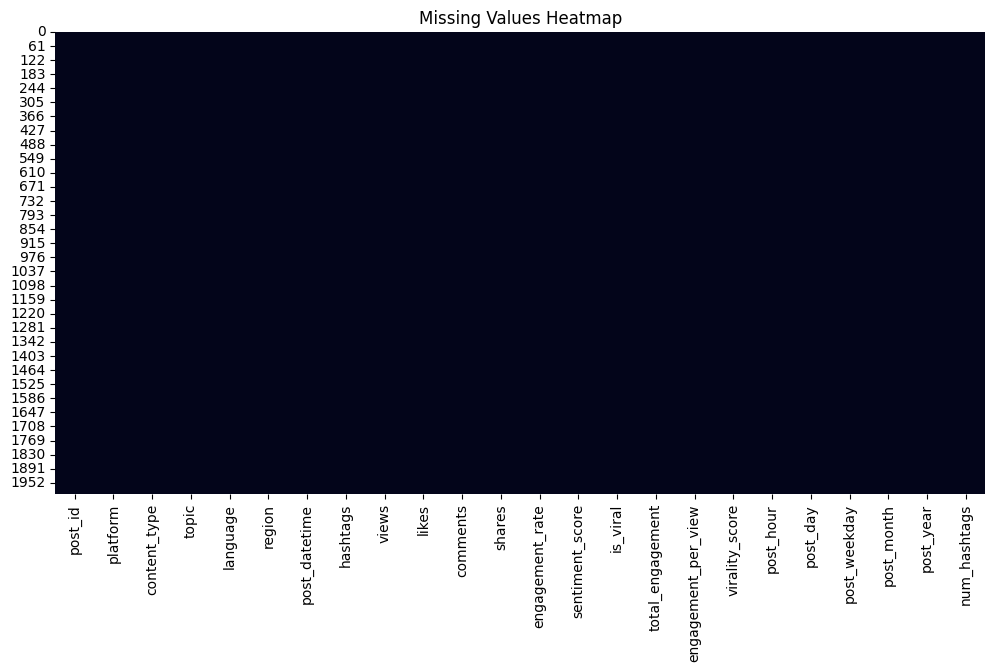

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


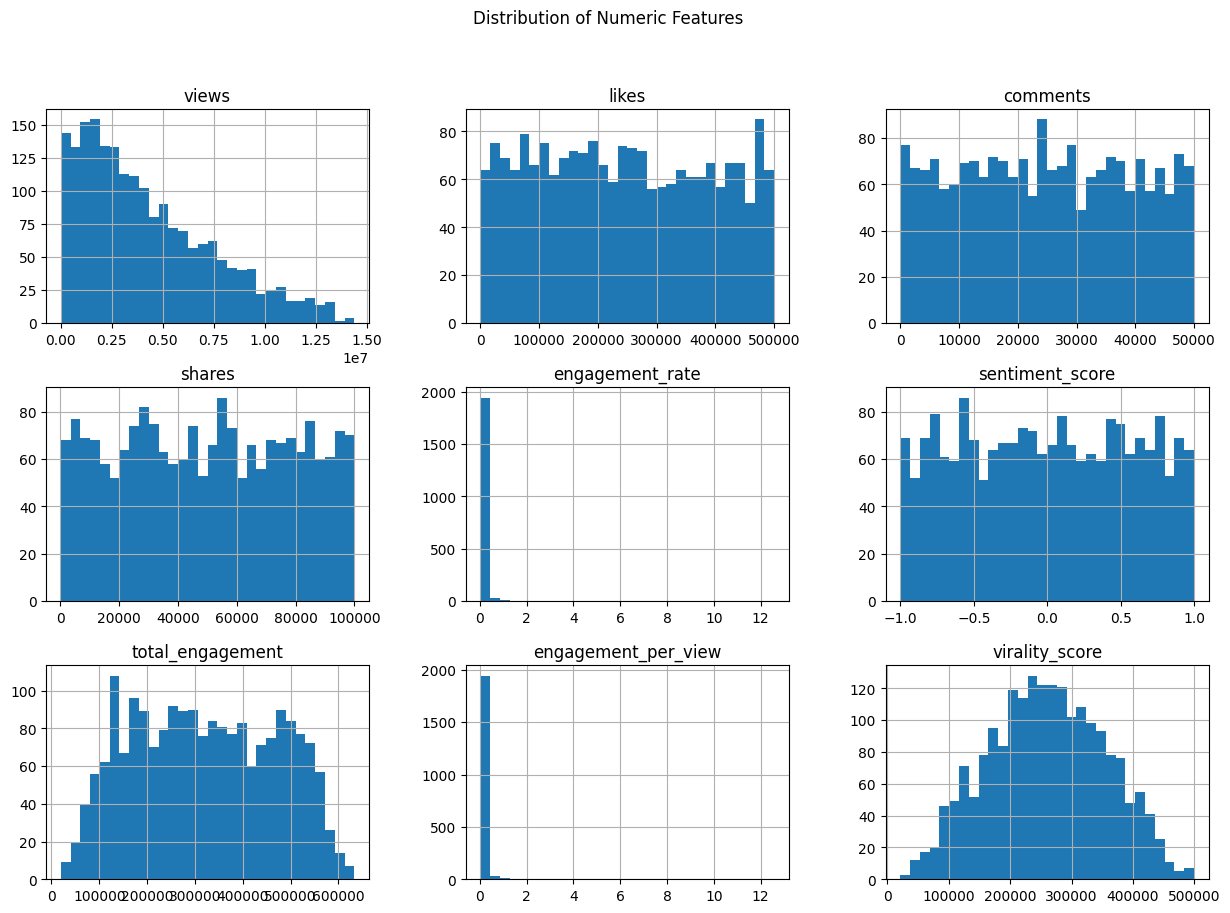

In [24]:
num_cols = ['views', 'likes', 'comments', 'shares', 
            'engagement_rate', 'sentiment_score', 
            'total_engagement', 'engagement_per_view', 'virality_score']

df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribution of Numeric Features")
plt.show()


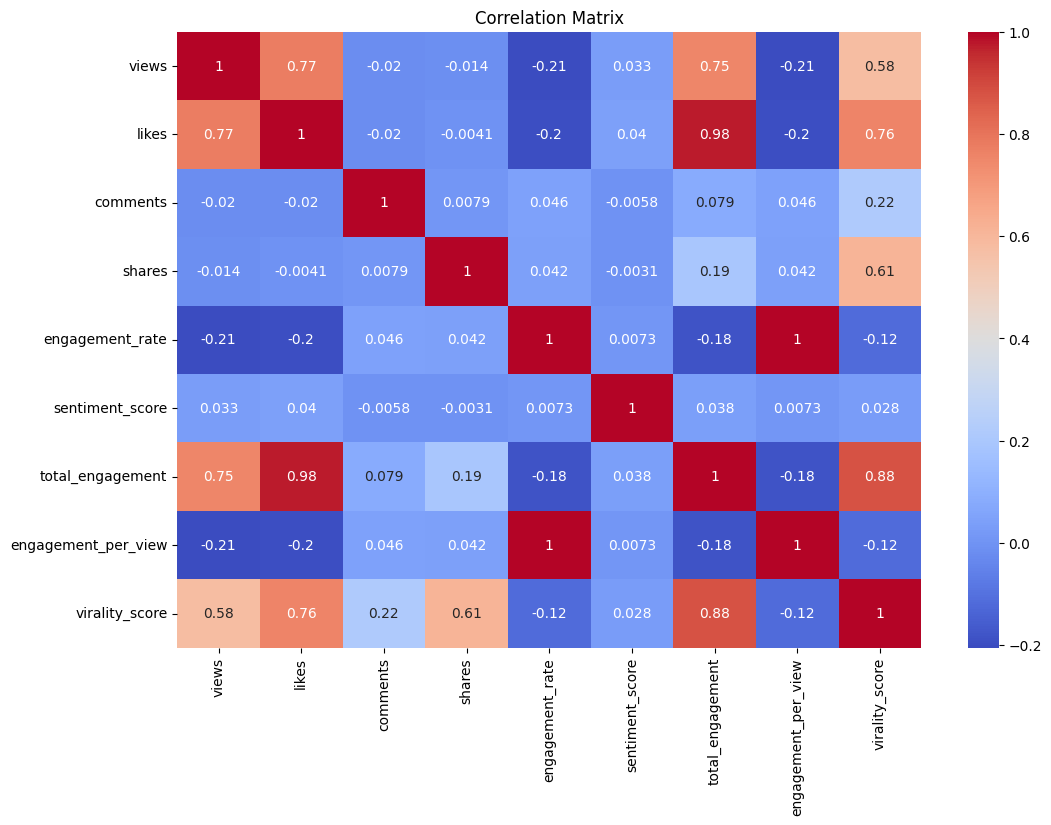

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


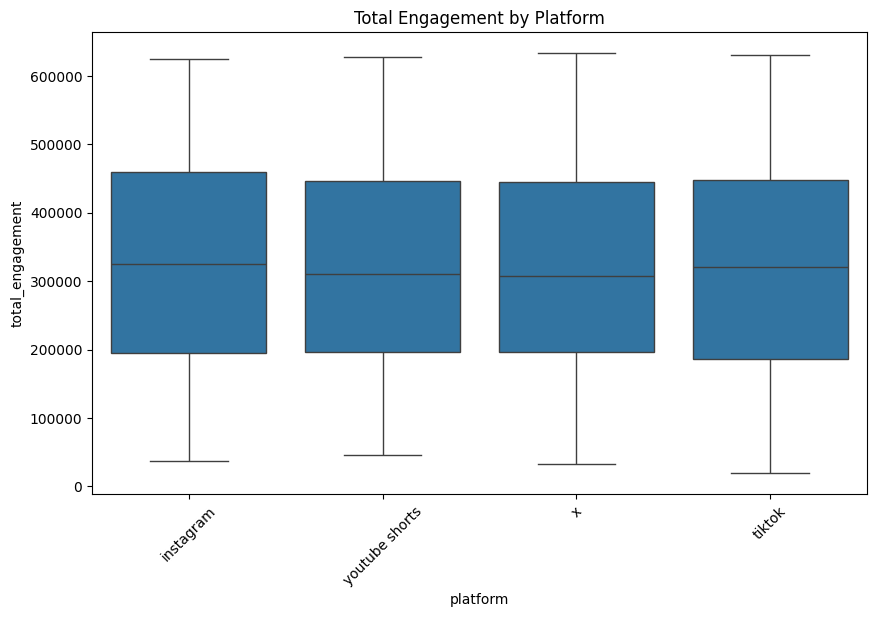

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='platform', y='total_engagement')
plt.title("Total Engagement by Platform")
plt.xticks(rotation=45)
plt.show()


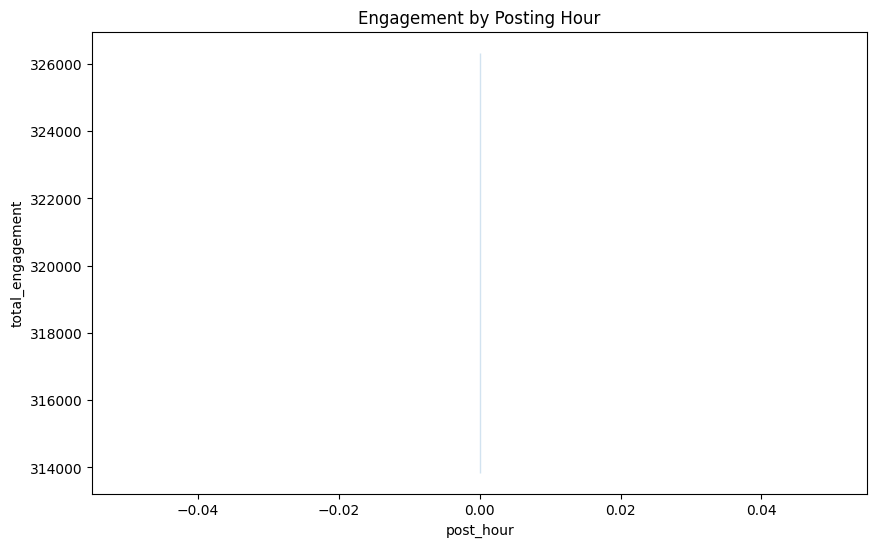

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='post_hour', y='total_engagement')
plt.title("Engagement by Posting Hour")
plt.show()


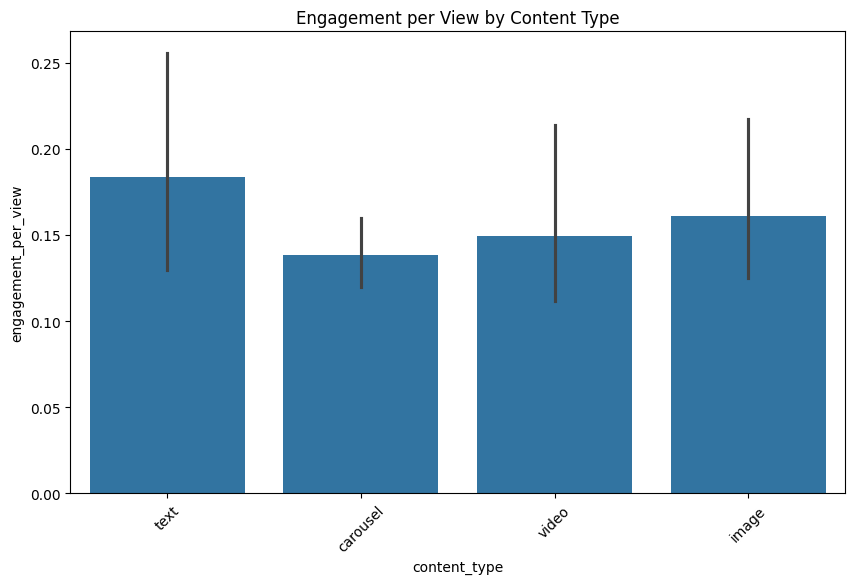

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='content_type', y='engagement_per_view')
plt.title("Engagement per View by Content Type")
plt.xticks(rotation=45)
plt.show()


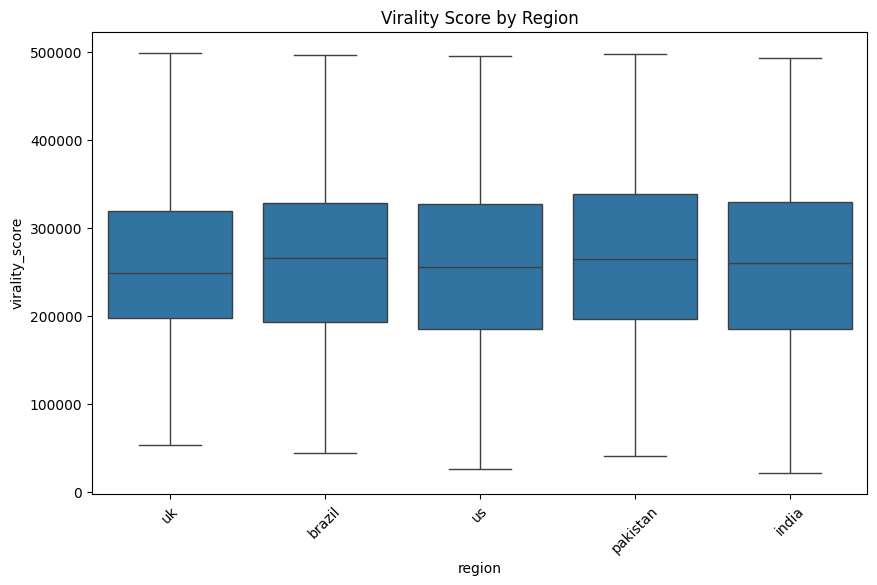

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='region', y='virality_score')
plt.title("Virality Score by Region")
plt.xticks(rotation=45)
plt.show()


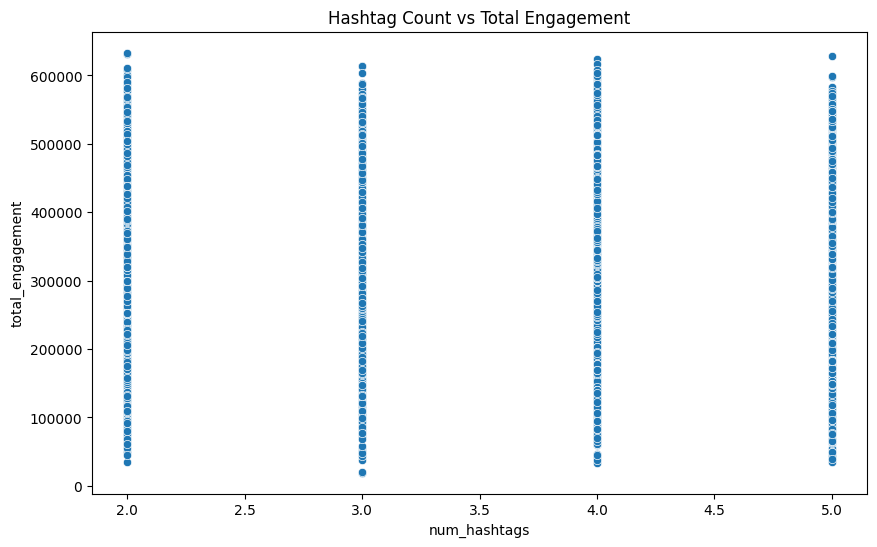

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='num_hashtags', y='total_engagement')
plt.title("Hashtag Count vs Total Engagement")
plt.show()


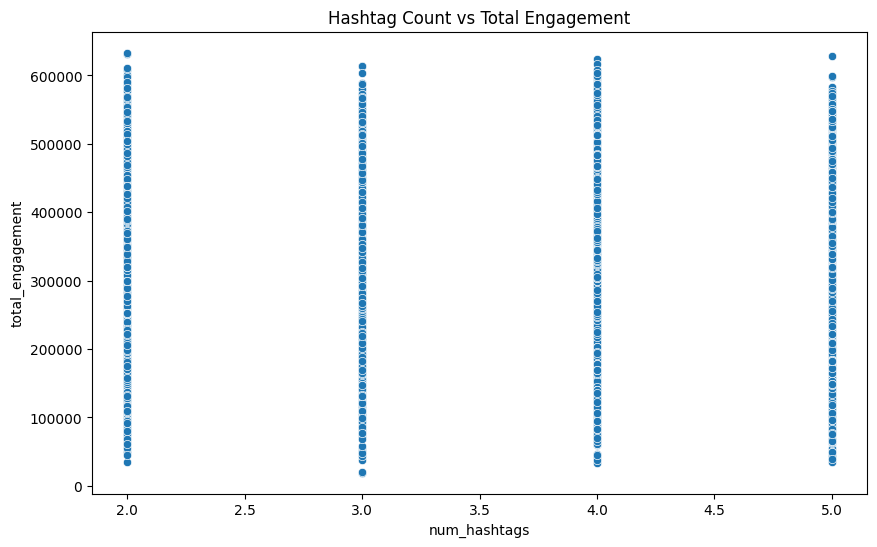

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='num_hashtags', y='total_engagement')
plt.title("Hashtag Count vs Total Engagement")
plt.show()


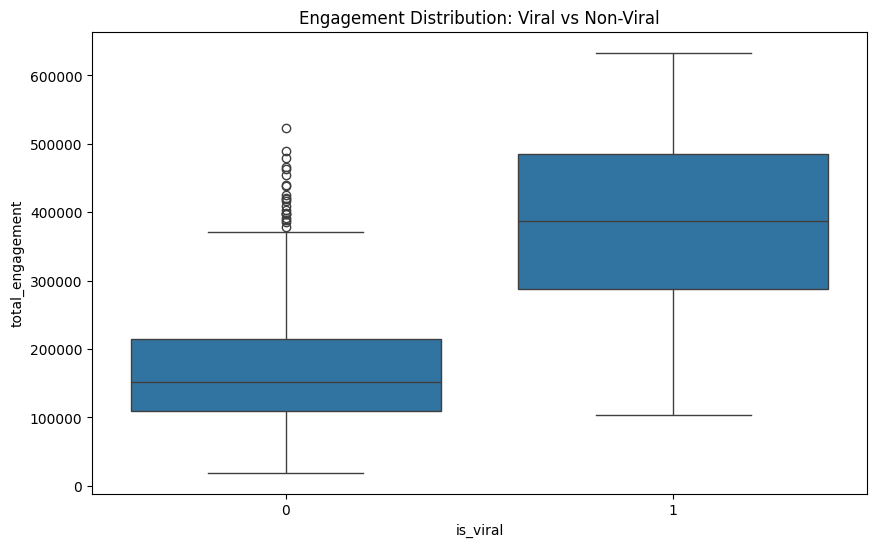

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='is_viral', y='total_engagement')
plt.title("Engagement Distribution: Viral vs Non-Viral")
plt.show()


In [33]:
output_path = r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\social_media_cleaned.csv"
df_cleaned.to_csv(output_path, index=False)


In [34]:
output_path_30 = r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\social_media_first_30_rows.csv"
df_cleaned.head(30).to_csv(output_path_30, index=False)


In [35]:
import pandas as pd

df = pd.read_csv(r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\social_media_cleaned.csv")
len(df.columns), df.columns.tolist()


(24,
 ['post_id',
  'platform',
  'content_type',
  'topic',
  'language',
  'region',
  'post_datetime',
  'hashtags',
  'views',
  'likes',
  'comments',
  'shares',
  'engagement_rate',
  'sentiment_score',
  'is_viral',
  'total_engagement',
  'engagement_per_view',
  'virality_score',
  'post_hour',
  'post_day',
  'post_weekday',
  'post_month',
  'post_year',
  'num_hashtags'])